In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')


In [20]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


drop unavailable attributes

In [4]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
v1    5572 non-null object
v2    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


plotting graph for distribution

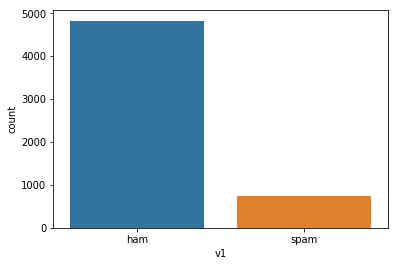

In [6]:
sns.countplot(df.v1)

rename columns

In [7]:
sms = df.rename(columns = {'v1':'label','v2':'message'})

In [8]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [9]:
sms.shape

(5572, 2)

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(sms["message"],sms["label"], test_size = 0.3)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(x_train)
x_train_df = vect.transform(x_train)
x_test_df = vect.transform(x_test)

ham_words = ''
spam_words = ''
spam = sms[sms.label == 1]
ham = sms[sms.label == 0]


In [12]:
import nltk

for val in spam.message:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words + ' '
        
for val in ham.message:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1')
lr.fit(x_train_df,y_train)
log = lr.score(x_test_df,y_test)
print('Logistic regression score ',log)


Logistic regression score  0.9802631578947368


C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
mnb = MultinomialNB(alpha = 0.5)
mnb.fit(x_train_df,y_train)

y_mnb = mnb.predict(x_test_df)

In [15]:
print('Naive Bayes Accuracy: ', accuracy_score( y_mnb , y_test))

Naive Bayes Accuracy:  0.9886363636363636


In [16]:
knc = KNeighborsClassifier(n_neighbors=100)
knc.fit(x_train_df,y_train)

y_knc = knc.predict(x_test_df)

In [17]:
print('KNeighbors Accuracy_score: ',accuracy_score(y_test,y_knc))

KNeighbors Accuracy_score:  0.8648325358851675


In [18]:
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=252)
dtc.fit(x_train_df,y_train)
y_dtc = dtc.predict(x_test_df)

In [19]:
print('Decision Tree Accuracy: ',accuracy_score(y_test,y_dtc))
print('Decision Tree confusion_matrix: ', confusion_matrix(y_dtc, y_test))    

Decision Tree Accuracy:  0.9706937799043063
Decision Tree confusion_matrix:  [[1429   32]
 [  17  194]]


In [21]:
rfc = RandomForestClassifier(n_estimators=37, random_state=252)
rfc.fit(x_train_df,y_train)
y_rfc = rfc.predict(x_test_df)

In [22]:
print('Random Forest Accuracy_score: ',accuracy_score(y_test,y_rfc))
print('Random Forest confusion_matrix: ', confusion_matrix(y_rfc, y_test)) 

Random Forest Accuracy_score:  0.9706937799043063
Random Forest confusion_matrix:  [[1446   49]
 [   0  177]]


In [23]:
bc = BaggingClassifier(n_estimators=9, random_state=252)
bc.fit(x_train_df,y_train)
y_bc = bc.predict(x_test_df)

In [24]:
print('Bagging Accuracy_score: ',accuracy_score(y_test,y_bc))
print('Bagging confusion_matrix: ', confusion_matrix(y_bc, y_test)) 

Bagging Accuracy_score:  0.9736842105263158
Bagging confusion_matrix:  [[1435   33]
 [  11  193]]
